In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---- Summary of the twitter accounts -----#
# RER_A
# RERB
# RERC_SNCF --< Infotrafic
# RERD_SNCF --< Infotrafic
# RERE_SNCF --< Infotrafic
# Ligne12_RATP --< from 1 to 14 lines

line_list = ['RER_A', 'RER_B', 'RER_C', 'RER_D', 'RER_E','Ligne1_RATP', 'Ligne2_RATP', 'Ligne3_RATP', 'Ligne4_RATP',
 'Ligne5_RATP', 'Ligne6_RATP', 'Ligne7_RATP', 'Ligne8_RATP', 'Ligne9_RATP', 'Ligne10_RATP', 'Ligne11_RATP', 'Ligne12_RATP',
 'Ligne13_RATP', 'Ligne14_RATP' ]

file_path = "data/"
line_dict = dict()
for item in line_list:
    line_dict[item] = pd.read_csv(file_path + item +'.csv', sep=';',error_bad_lines=False)
    


b'Skipping line 4313: expected 10 fields, saw 11\n'
b'Skipping line 1089: expected 10 fields, saw 11\nSkipping line 4918: expected 10 fields, saw 11\nSkipping line 7193: expected 10 fields, saw 11\n'
b'Skipping line 11823: expected 10 fields, saw 11\nSkipping line 12791: expected 10 fields, saw 11\nSkipping line 17202: expected 10 fields, saw 11\nSkipping line 17564: expected 10 fields, saw 11\nSkipping line 17567: expected 10 fields, saw 11\nSkipping line 17835: expected 10 fields, saw 11\nSkipping line 17848: expected 10 fields, saw 11\nSkipping line 18418: expected 10 fields, saw 11\nSkipping line 18430: expected 10 fields, saw 11\nSkipping line 18509: expected 10 fields, saw 11\nSkipping line 18599: expected 10 fields, saw 11\nSkipping line 18880: expected 10 fields, saw 11\nSkipping line 18920: expected 10 fields, saw 11\nSkipping line 19707: expected 10 fields, saw 11\n'
b'Skipping line 4081: expected 10 fields, saw 11\nSkipping line 10409: expected 10 fields, saw 11\nSkipping li

In [2]:
# Check how many items we have
for k,v in line_dict.items():
    print(k, v.shape)
    #print(v.head())

RER_A (21028, 10)
RER_B (15540, 10)
RER_C (23086, 10)
RER_D (23306, 10)
RER_E (8497, 10)
Ligne1_RATP (7436, 10)
Ligne2_RATP (5518, 10)
Ligne3_RATP (5043, 10)
Ligne4_RATP (9091, 10)
Ligne5_RATP (5998, 10)
Ligne6_RATP (6977, 10)
Ligne7_RATP (5963, 10)
Ligne8_RATP (5903, 10)
Ligne9_RATP (5642, 10)
Ligne10_RATP (3950, 10)
Ligne11_RATP (3812, 10)
Ligne12_RATP (6335, 10)
Ligne13_RATP (6992, 10)
Ligne14_RATP (4927, 10)


In [3]:
line_dict['Ligne11_RATP'].head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,Ligne11_RATP,2017-10-10 12:19,0,0,"Bonjour, la #Ligne11 fonctionne correctement, ...",NaN,NaN,#Ligne11,9.176961e+17,https://twitter.com/Ligne11_RATP/status/917696...
1,Ligne11_RATP,2017-10-09 14:22,0,1,"Demain, le trafic sera normal sur votre #ligne...",NaN,NaN,#ligne11 #RATP #greve10octobre,9.173647e+17,https://twitter.com/Ligne11_RATP/status/917364...
2,Ligne11_RATP,2017-10-08 12:58,0,1,Retour à un trafic régulier sur l'ensemble de ...,NaN,NaN,#Ligne11 #RATP,9.169811e+17,https://twitter.com/Ligne11_RATP/status/916981...
3,Ligne11_RATP,2017-10-08 12:51,1,0,"12:51, Retour à un trafic régulier sur l'ensem...",NaN,NaN,#Ligne11 #RATP,9.169795e+17,https://twitter.com/Ligne11_RATP/status/916979...
4,Ligne11_RATP,2017-10-08 12:45,1,0,"12:43, le trafic reprend progressivement (coli...",NaN,NaN,#RATP #Ligne11,9.169778e+17,https://twitter.com/Ligne11_RATP/status/916977...


In [4]:
line_dict['RER_B'].head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,RERB,2017-10-12 19:16,0,0,Toutes les missions sont rendues omnibus. Bonn...,NaN,NaN,NaN,9.185259e+17,https://twitter.com/RERB/status/91852587036885...
1,RERB,2017-10-12 18:51,1,0,"Bonsoir, le trafic reprend progressivement mai...",NaN,NaN,NaN,9.185196e+17,https://twitter.com/RERB/status/91851956429560...
2,RERB,2017-10-12 18:45,1,0,Il est également possible de prendre un train ...,NaN,NaN,NaN,9.185180e+17,https://twitter.com/RERB/status/91851797897883...
3,RERB,2017-10-12 18:40,0,0,"Bonsoir, oui des trains circulent au départ d'...",NaN,NaN,NaN,9.185168e+17,https://twitter.com/RERB/status/91851677975599...
4,RERB,2017-10-12 18:36,0,1,"Bonsoir, l'incident est terminé, le trafic rep...",NaN,NaN,NaN,9.185157e+17,https://twitter.com/RERB/status/91851566784590...


In [5]:
# sort by retweets --> a dog is missing??? comes up first???
line_dict['RER_A'].sort_values(by='retweets',ascending = False)['text'].head()

2987     Ce chien a été retrouvé ce matin, vers 7h, sur...
107      1 incident électrique au niveau de la caténair...
784      [ #TravauxEteRERA ] Les travaux sont terminés ...
16061    Arrêt de travail spontané en raison de l'agres...
16046    Depuis 7h52 fermeture des gares #RERA #RATP sa...
Name: text, dtype: object

In [6]:
# find all station names --> gares
df_st = pd.read_csv('data\gares.csv', delimiter=';')
gares = df_st.nomptar.str.split('(')
gares = [x[0].rstrip(' ') for x in gares] # la defense has a lagging space

In [7]:
line_dict['RER_C'].username[0]

'RERC_SNCF'

In [8]:
# change display to 200
## Step 1: delete all 
## Théo, Bonjour, @, Tom, Emma
import re
def clean_data(input):
    pd.options.display.max_colwidth = 200
    input['date'] = pd.to_datetime(input.date)
    input = input[input.date > pd.to_datetime('2014-1-1')]
    
    # replace pte, chateau 
    input.text = input.text.str.replace('Pte|pte', 'Porte')
    input.text = input.text.str.replace('Chateau|chateau', 'Château')
    
    if re.search('RER[CDE]_SNCF',input.username.iloc[0]):
        output = input[input.text.str.contains('Infotrafic', na=False)]
    else:
        to_drop = ["Bonjour", "@",'Théo', 'Emma','Bjr','Inès',
                   'Lana','vous','soirée','Oui','estimée', 
                   'Travaux prévus','journée','bonjour','rerb', 
                   'rerc','rerd', 'rere','Infotrafic'] # all about conversations 
        output = input[~input.text.str.contains('|'.join(to_drop), na=False)]
    return output

In [9]:
clean_data(line_dict['RER_B'])

D:\Users\ThinkPad\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
2,RERB,2017-10-12 18:45:00,1,0,"Il est également possible de prendre un train vers le sud à Bourg-la-Reine, le trafic reprend progressivement. Bon courage. ^B",NaN,NaN,NaN,9.185180e+17,https://twitter.com/RERB/status/918517978978832385
3,RERB,2017-10-12 18:40:00,0,0,"Bonsoir, oui des trains circulent au départ d'Antony, le trafic reste néanmoins perturbé. Bon courage. ^B",NaN,NaN,NaN,9.185168e+17,https://twitter.com/RERB/status/918516779755999232
4,RERB,2017-10-12 18:36:00,0,1,"Bonsoir, l'incident est terminé, le trafic reprend progressivement sur l'ensemble de la ligne. Vy",NaN,NaN,NaN,9.185157e+17,https://twitter.com/RERB/status/918515667845906433
6,RERB,2017-10-12 18:33:00,1,0,"Bonsoir, l'incident à la Croix-de-Berny, le trafic reprend progressivement. Bon courage. ^B",NaN,NaN,NaN,9.185151e+17,https://twitter.com/RERB/status/918515096997060609
7,RERB,2017-10-12 18:32:00,4,0,"Fin d'incident à la Croix-de-Berny, reprise progressive du trafic sur l'ensemble de la ligne #RERB",NaN,NaN,#RERB,9.185148e+17,https://twitter.com/RERB/status/918514837776453632
8,RERB,2017-10-12 18:20:00,3,0,"[Accident grave de voyageur] En + de la ligne 197, bus de substitution entre Antony et Brg-la-Reine. Desserte des gares intermédiaires #RERB",NaN,NaN,#RERB,9.185116e+17,https://twitter.com/RERB/status/918511606824427520
9,RERB,2017-10-12 18:15:00,1,0,"Bonsoir, tous les trains sont terminus Bourg-la-Reine suite à l'accident grave de voyageur. Bon courage. ^B",NaN,NaN,NaN,9.185105e+17,https://twitter.com/RERB/status/918510466107936768
10,RERB,2017-10-12 18:09:00,0,0,"Bonsoir, il y a un accident grave de voyageur à Croix-de-Berny. Bon courage. ^B",NaN,NaN,NaN,9.185090e+17,https://twitter.com/RERB/status/918509004799795200
11,RERB,2017-10-12 18:02:00,1,0,"Bonsoir, non le trafic est interrompu entre Bourg-la-Reine et Antony dans les deux sens de circulation. Bon courage. ^B",NaN,NaN,NaN,9.185073e+17,https://twitter.com/RERB/status/918507275119222784
12,RERB,2017-10-12 18:02:00,5,6,[Accident grave de voyageur] Des bus de substitut° sont mis en place à Bourg-la -Reine (1er départ 17h38) et Antony (1er départ 17h55) #RERB,NaN,NaN,#RERB,9.185071e+17,https://twitter.com/RERB/status/918507076829278209


In [10]:
# after data cleaning, size of the data set 
for k in line_dict.keys():
    line_dict[k] = clean_data(line_dict[k])
    print(k, line_dict[k].shape)

D:\Users\ThinkPad\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


RER_A (8214, 10)
RER_B (6586, 10)
RER_C (2502, 10)
RER_D (2967, 10)
RER_E (1567, 10)
Ligne1_RATP (2965, 10)
Ligne2_RATP (2221, 10)
Ligne3_RATP (2073, 10)
Ligne4_RATP (4314, 10)
Ligne5_RATP (2671, 10)
Ligne6_RATP (3439, 10)
Ligne7_RATP (2851, 10)
Ligne8_RATP (3013, 10)
Ligne9_RATP (2546, 10)
Ligne10_RATP (1345, 10)
Ligne11_RATP (1285, 10)
Ligne12_RATP (2616, 10)
Ligne13_RATP (3104, 10)
Ligne14_RATP (1786, 10)


In [12]:
# top 20 frequent words
import nltk
def words_freq(output):
    moby_tokens = nltk.word_tokenize(output.text.str.lower().str.cat(sep = ' '))
    text1 = nltk.Text(moby_tokens)
    nltk.FreqDist(text1).most_common(20)
    stopwords = nltk.corpus.stopwords.words('french')
    stopwords = stopwords + ['rera','ratp','ligne','entre',
                             'http','les','vers','dir','trafic','gare']
    words_except_stop_dist = nltk.FreqDist(w for w in text1 if w not 
                                           in stopwords and w.isalpha() )
    return words_except_stop_dist

In [13]:
from collections import Counter
def gare_fq(output):
    gare_freq = Counter()
    for gare in gares:
        gare_freq[gare] = output.text.str.lower().str.contains(gare.lower()).sum()
    return gare_freq


In [15]:
# sometimes, cergy-le-haut, naterre may be due to their direction --> 
# result is true, many items are entre XXX et XXX
line_dict['RER_A'].text[line_dict['RER_A'].text.str.contains('Cergy-Le-Haut')].sample(10)

13747                   15:00, le trafic reprend progressivement entre Cergy-Le-Haut et Maisons-Laffitte (accident grave de voyageur) #RATP #RERA
8088                             20:48, le trafic est ralenti entre La Defense (Grande Arche) et Cergy-Le-Haut (voyageur sur la voie) #RATP #RERA
7736                                     07:13, le trafic est interrompu entre Cergy-Prefecture et Cergy-Le-Haut (incident technique) #RATP #RERA
9022                              15:18, le trafic reprend progressivement entre Maisons-Laffitte et Cergy-Le-Haut (panne électrique) #RATP #RERA
13706    08:18, le trafic est ralenti entre La Defense et Cergy-Le-Haut (incident technique) #RATP #RERA L'incident concerne également la #ligneL
5400                             20:09, le trafic est interrompu entre Maisons-Laffitte et Cergy-Le-Haut (accident grave de voyageur) #RATP #RERA
337                                                                La rame est repartie de Torcy en d° de Cergy-Le-Haut/Pois

In [17]:
## Now let's try RER B
output_b = line_dict['RER_B']
words_freq(output_b).most_common(20)

[('rerb', 5417),
 ('incident', 1417),
 ('perturbé', 1111),
 ('retour', 1044),
 ('terminé', 963),
 ('régulier', 921),
 ('voyageur', 861),
 ('aeroport', 688),
 ('colis', 678),
 ('suspect', 676),
 ('nord', 663),
 ('interrompu', 651),
 ('cdg', 631),
 ('panne', 555),
 ('ralenti', 476),
 ('mitry', 451),
 ('train', 446),
 ('robinson', 432),
 ('claye', 401),
 ('charles', 381)]

In [18]:
gare_fq(output_b).most_common(20)

[('Gare du Nord', 584),
 ('Robinson', 464),
 ('Palaiseau', 225),
 ('Les Halles', 213),
 ('Antony', 144),
 ('Bourg-la-Reine', 112),
 ('Mitry-Claye', 106),
 ('Châtelet', 98),
 ('Laplace', 90),
 ('Massy-Palaiseau', 84),
 ('Luxembourg', 83),
 ('Aulnay-sous-Bois', 65),
 ('Parc des Expositions', 60),
 ('Le Bourget', 57),
 ('Port Royal', 52),
 ('Cité', 41),
 ('La Plaine-Stade de France', 31),
 ('Orsay-Ville', 31),
 ('Denfert-Rochereau', 30),
 ('Sceaux', 29)]

In [19]:
# what if we write a summary function 
def summary(input):
    output = input
    print()
    print ('The 20 most frequent words are: ')
    print(words_freq(output).most_common(20))
    print('\n')
    print('The 20 most frequent stations are: ')
    print(gare_fq(output).most_common(20))
    print('\n')
    print('The 20 most frequent reasons are: ')
    print(incidient_reason(output).most_common(20))
#summary(line_dict['RER_A'])

In [20]:
from collections import Counter
def incidient_reason(input):
    output = input
    incidents = ['malaise voyageur',"incident d'exploitation","incident technique",'Incident de signalisation'
                "colis suspect", "voyageur malade", "incident voyageur", 
                "divers incidents",'panne de signalisation','panne de matériel',
                'panne électrique','panne mécanique','panne de caténaire',
                "panne d'aiguillage",'panne matériel','panne éléctrique', 
                'panne sur un train','pannes de signalisation',"panne d'un train",
                "panne de train",'obstacle sur la voie', 'bagage abandonné','incident de passage', 
                 'accident de personne','feu aux abords','pb signalisation','acte de malveillance',
                 'jets de pierre','obstacle sur la voie','bagage oublié',
                 'personnes sur les voies','branche tombée','jet de projectile']
    incident_freq = Counter()
    for incident in incidents:
        incident_freq[incident] = output.text.str.lower().str.contains(incident.lower()).sum()
    return incident_freq   

In [21]:
line_dict['RER_C'].sample(10).text

5009                                                          Infotrafic #RERC : Saint Michel non desservi (2 sens) >17h (bagage oublié à Saint Michel)
5107                                                     Infotrafic #RERC : JAVEL non desservi, dans les deux sens jusqu'à 20h. (bagage oublié à JAVEL)
6410     Infotrafic #RERC [MàJ] +10/20 min direct° de Versailles Chantiers, Versailles Château RG, Massy P,Dourdan et Étampes http:// ow.ly/IZ79308ieYG
4248      Infotrafic #RERC : Trafic ralenti sur l' ensemble de la ligne (prolongation tvx et défaut d'alimentation électr.) > http:// ow.ly/edc330aYkVv
8318                           Infotrafic #RERC : Péreire Levallois / Pontoise interrompu jusqu'à 15h00. (panne d’un train) > http:// ow.ly/VYAq3066wO7
13929       Infotrafic #RERC +45 min Paris/Versaille/St-Quentin/Pontoise (ce sens). (vérifications de sécurité sur un train.) http:// ow.ly/yQqj3009I0e
7035                                  Infotrafic #RERC : [MAJ] Reprise de la desserte SA

In [22]:
incidient_reason(line_dict['RER_C']).most_common()

[('bagage abandonné', 149),
 ('bagage oublié', 144),
 ('personnes sur les voies', 113),
 ("panne d'un train", 103),
 ('accident de personne', 78),
 ('malaise voyageur', 25),
 ('acte de malveillance', 24),
 ('obstacle sur la voie', 15),
 ('incident technique', 11),
 ('incident de passage', 9),
 ('feu aux abords', 8),
 ('branche tombée', 8),
 ('panne électrique', 6),
 ('jets de pierre', 5),
 ('panne de signalisation', 4),
 ('panne sur un train', 3),
 ('pb signalisation', 3),
 ('jet de projectile', 3),
 ('incident voyageur', 2),
 ("panne d'aiguillage", 2),
 ('divers incidents', 1),
 ('panne de train', 1),
 ("incident d'exploitation", 0),
 ('Incident de signalisationcolis suspect', 0),
 ('voyageur malade', 0),
 ('panne de matériel', 0),
 ('panne mécanique', 0),
 ('panne de caténaire', 0),
 ('panne matériel', 0),
 ('panne éléctrique', 0),
 ('pannes de signalisation', 0)]

In [23]:
# Then get a global view !!!
for k, v in line_dict.items():
    try:
        print(k,'\n')
        summary(v)
    except:
        print('Something is wrong')
        pass

RER_A 


The 20 most frequent words are: 
[('incident', 1982), ('retour', 1320), ('ralenti', 1302), ('régulier', 1219), ('terminé', 1205), ('colis', 1182), ('suspect', 1173), ('voyageur', 1093), ('interrompu', 887), ('poissy', 715), ('perturbé', 654), ('panne', 575), ('rame', 551), ('stationne', 507), ('malaise', 481), ('chessy', 466), ('nation', 460), ('train', 446), ('travaux', 442), ('auber', 431)]


The 20 most frequent stations are: 
[('Poissy', 799), ('Nation', 504), ('Auber', 459), ('Vincennes', 335), ('La Défense', 198), ('Torcy', 176), ('Les Halles', 158), ('Cergy-Le-Haut', 141), ('Gare de Lyon', 126), ('Val de Fontenay', 124), ('Noisy-le-Grand', 100), ('Châtelet', 97), ('Rueil-Malmaison', 95), ('Maisons-Laffitte', 87), ('Europe', 67), ('Varenne', 67), ("Val d'europe", 63), ('Sartrouville', 52), ('Nanterre-Préfecture', 39), ('Champigny', 35)]


The 20 most frequent reasons are: 
[('malaise voyageur', 471), ('incident technique', 381), ('incident voyageur', 245), ('panne de mat

Ligne2_RATP 


The 20 most frequent words are: 
[('incident', 762), ('retour', 504), ('régulier', 481), ('terminé', 471), ('voyageur', 445), ('ralenti', 370), ('interrompu', 236), ('nation', 216), ('malaise', 194), ('rame', 183), ('porte', 165), ('dauphine', 163), ('station', 155), ('stationne', 149), ('colis', 148), ('suspect', 147), ('marechal', 138), ('lattre', 138), ('tassigny', 138), ('technique', 127)]


The 20 most frequent stations are: 
[('Nation', 220), ('Porte Dauphine', 162), ('Anvers', 46), ('Blanche', 41), ('La Chapelle', 40), ('Stalingrad', 34), ('Belleville', 26), ('Avron', 25), ('Colonel Fabien', 23), ('Pigalle', 22), ('Victor Hugo', 17), ('Gare du Nord', 15), ('Ternes', 15), ('Villiers', 14), ('Couronnes', 13), ('Rome', 12), ('Robinson', 11), ('Jaurès', 10), ('Châtelet', 9), ('Concorde', 8)]


The 20 most frequent reasons are: 
[('malaise voyageur', 194), ('incident technique', 123), ('incident voyageur', 107), ('panne de matériel', 55), ('panne de signalisation', 43)



The 20 most frequent words are: 
[('incident', 947), ('retour', 684), ('régulier', 659), ('terminé', 634), ('ralenti', 566), ('voyageur', 474), ('panne', 369), ('interrompu', 306), ('lac', 299), ('pointe', 292), ('rame', 274), ('balard', 270), ('colis', 247), ('suspect', 247), ('station', 242), ('matériel', 232), ('stationne', 216), ('malaise', 195), ('technique', 160), ('concorde', 151)]


The 20 most frequent stations are: 
[('Pointe du Lac', 292), ('Balard', 270), ('Concorde', 151), ('Maisons-Alfort-Les Juilliottes', 95), ('Invalides', 78), ('La Motte-Picquet-Grenelle', 77), ('République', 44), ('Porte de Charenton', 44), ('Daumesnil', 27), ('Bastille', 27), ('Ecole Militaire', 26), ('Madeleine', 21), ('Opéra', 21), ('Charenton-Ecoles', 20), ('Lourmel', 15), ('Filles du Calvaire', 13), ('Chemin Vert', 11), ('Varenne', 11), ('Porte Dorée', 10), ('Liberté', 10)]


The 20 most frequent reasons are: 
[('panne de matériel', 231), ('malaise voyageur', 195), ('incident technique', 158), 


The 20 most frequent words are: 
[('incident', 593), ('retour', 331), ('interrompu', 317), ('terminé', 302), ('régulier', 300), ('technique', 208), ('panne', 168), ('ralenti', 161), ('matériel', 150), ('olympiades', 146), ('madeleine', 141), ('lyon', 133), ('voyageur', 132), ('station', 124), ('mitterrand', 102), ('travaux', 96), ('reprend', 95), ('chatelet', 89), ('progressivement', 84), ('malaise', 75)]


The 20 most frequent stations are: 
[('Saint-Lazare', 205), ('Olympiades', 151), ('Madeleine', 140), ('Gare de Lyon', 135), ('Châtelet', 27), ('Pyramides', 22), ('Bercy', 19), ('Mairie de Saint-Ouen', 15), ('Gare du Nord', 13), ('Opéra', 12), ('Europe', 10), ('Robinson', 9), ('Concorde', 8), ('Auber', 8), ('Nation', 7), ('La Défense', 6), ('Les Halles', 5), ('Blanche', 5), ('Cour Saint-Emilion', 5), ('Passy', 4)]


The 20 most frequent reasons are: 
[('incident technique', 207), ('panne de matériel', 149), ('malaise voyageur', 75), ('incident voyageur', 35), ("incident d'exploitati

In [24]:
# concat all dataframe and clean data
def consol(data_dic):
    result = pd.DataFrame()
    for k, v in data_dic.items():
        result = pd.concat([result, v])
    result = result.sort_values(by='date')
    return result
df_consol = consol(line_dict)

In [25]:
# overall summary
summary(df_consol)


The 20 most frequent words are: 
[('incident', 16705), ('retour', 10651), ('terminé', 10075), ('régulier', 9967), ('ralenti', 9386), ('voyageur', 7357), ('infotrafic', 7036), ('interrompu', 6890), ('rerb', 5823), ('colis', 5398), ('suspect', 5381), ('panne', 4838), ('malaise', 3437), ('technique', 3065), ('rame', 3048), ('rerd', 2971), ('perturbé', 2827), ('station', 2589), ('rerc', 2562), ('stationne', 2517)]


The 20 most frequent stations are: 
[('Nation', 1456), ('Gare du Nord', 957), ('Poissy', 802), ('Villiers', 728), ('Vincennes', 657), ('Auber', 595), ('Robinson', 571), ('Gare de Lyon', 538), ('Châtelet', 520), ('Concorde', 514), ("Place d'Italie", 512), ('Les Halles', 508), ('Saint-Lazare', 445), ('Mairie de Montrouge', 385), ('Porte de Clignancourt', 358), ('Palaiseau', 358), ('La Défense', 302), ('Château de Vincennes', 300), ('Malesherbes', 297), ('Pointe du Lac', 292)]


The 20 most frequent reasons are: 
[('malaise voyageur', 3404), ('incident technique', 3009), ('panne 

In [26]:
# overall tweets
df_consol.username.value_counts()

RER_A           8214
RERB            6586
Ligne4_RATP     4314
Ligne6_RATP     3439
Ligne13_RATP    3104
Ligne8_RATP     3013
RERD_SNCF       2967
Ligne1_RATP     2965
Ligne7_RATP     2851
Ligne5_RATP     2671
Ligne12_RATP    2616
Ligne9_RATP     2546
RERC_SNCF       2502
Ligne2_RATP     2221
Ligne3_RATP     2073
Ligne14_RATP    1786
RERE_SNCF       1567
Ligne10_RATP    1345
Ligne11_RATP    1285
Name: username, dtype: int64

In [ ]:
df_consol.date.apply(lambda x: x.date()).value_counts().shape

In [28]:
date_tweets = df_consol.date.apply(lambda x: x.date()).value_counts()
date_tweets.iloc[:10]

2015-01-29    278
2016-12-06    166
2015-06-30    161
2014-12-31    154
2017-06-24    144
2016-11-29    142
2016-08-14    134
2016-05-25    133
2016-03-29    129
2016-12-07    120
Name: date, dtype: int64

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

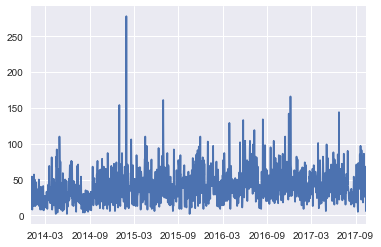

In [30]:
date_tweets.plot()

In [27]:
# export date, username, tweets count
df_consol['date_new'] =  df_consol.date.apply(lambda x: x.date())
df_consol.groupby(['date_new', 'username']).size().to_csv('tweets_date.csv')